In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LinearRegression

#Import dataset
df = pd.read_excel("Medical_Cost_Data.xlsx")

#Remove duplicates
df = df.drop_duplicates()
df.head()

,Age,Sex,BMI,Children,Smoker (yes/no),Region,Medical Insurance Charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Excel =if() equivlent

In [2]:
#2 Methods np.where() for simple conditions and np.select() used for multiple conditions
df["is_Smoker"] = np.where(df['Smoker (yes/no)']=='yes', 1, 0)

conditions = [
    (df['Sex'] == 'male'),
    (df['Sex'] == 'female')
    ]
choices = [1, 0]
df['is_Male'] = np.select(conditions, choices, default='NULL')

#Keep only revelent information
df = df[['Age', "is_Male", 'BMI', "Children", "is_Smoker", "Medical Insurance Charges"]]
df.head()

,Age,is_Male,BMI,Children,is_Smoker,Medical Insurance Charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520


In [3]:
df.describe()

,Age,BMI,Children,is_Smoker,Medical Insurance Charges
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,0.204936,13279.121487
std,14.044333,6.100468,1.205571,0.403806,12110.359656
min,18.000000,15.960000,0.000000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,0.000000,9386.161300
75%,51.000000,34.700000,2.000000,0.000000,16657.717450
max,64.000000,53.130000,5.000000,1.000000,63770.428010


<Axes: xlabel='Medical Insurance Charges', ylabel='Count'>

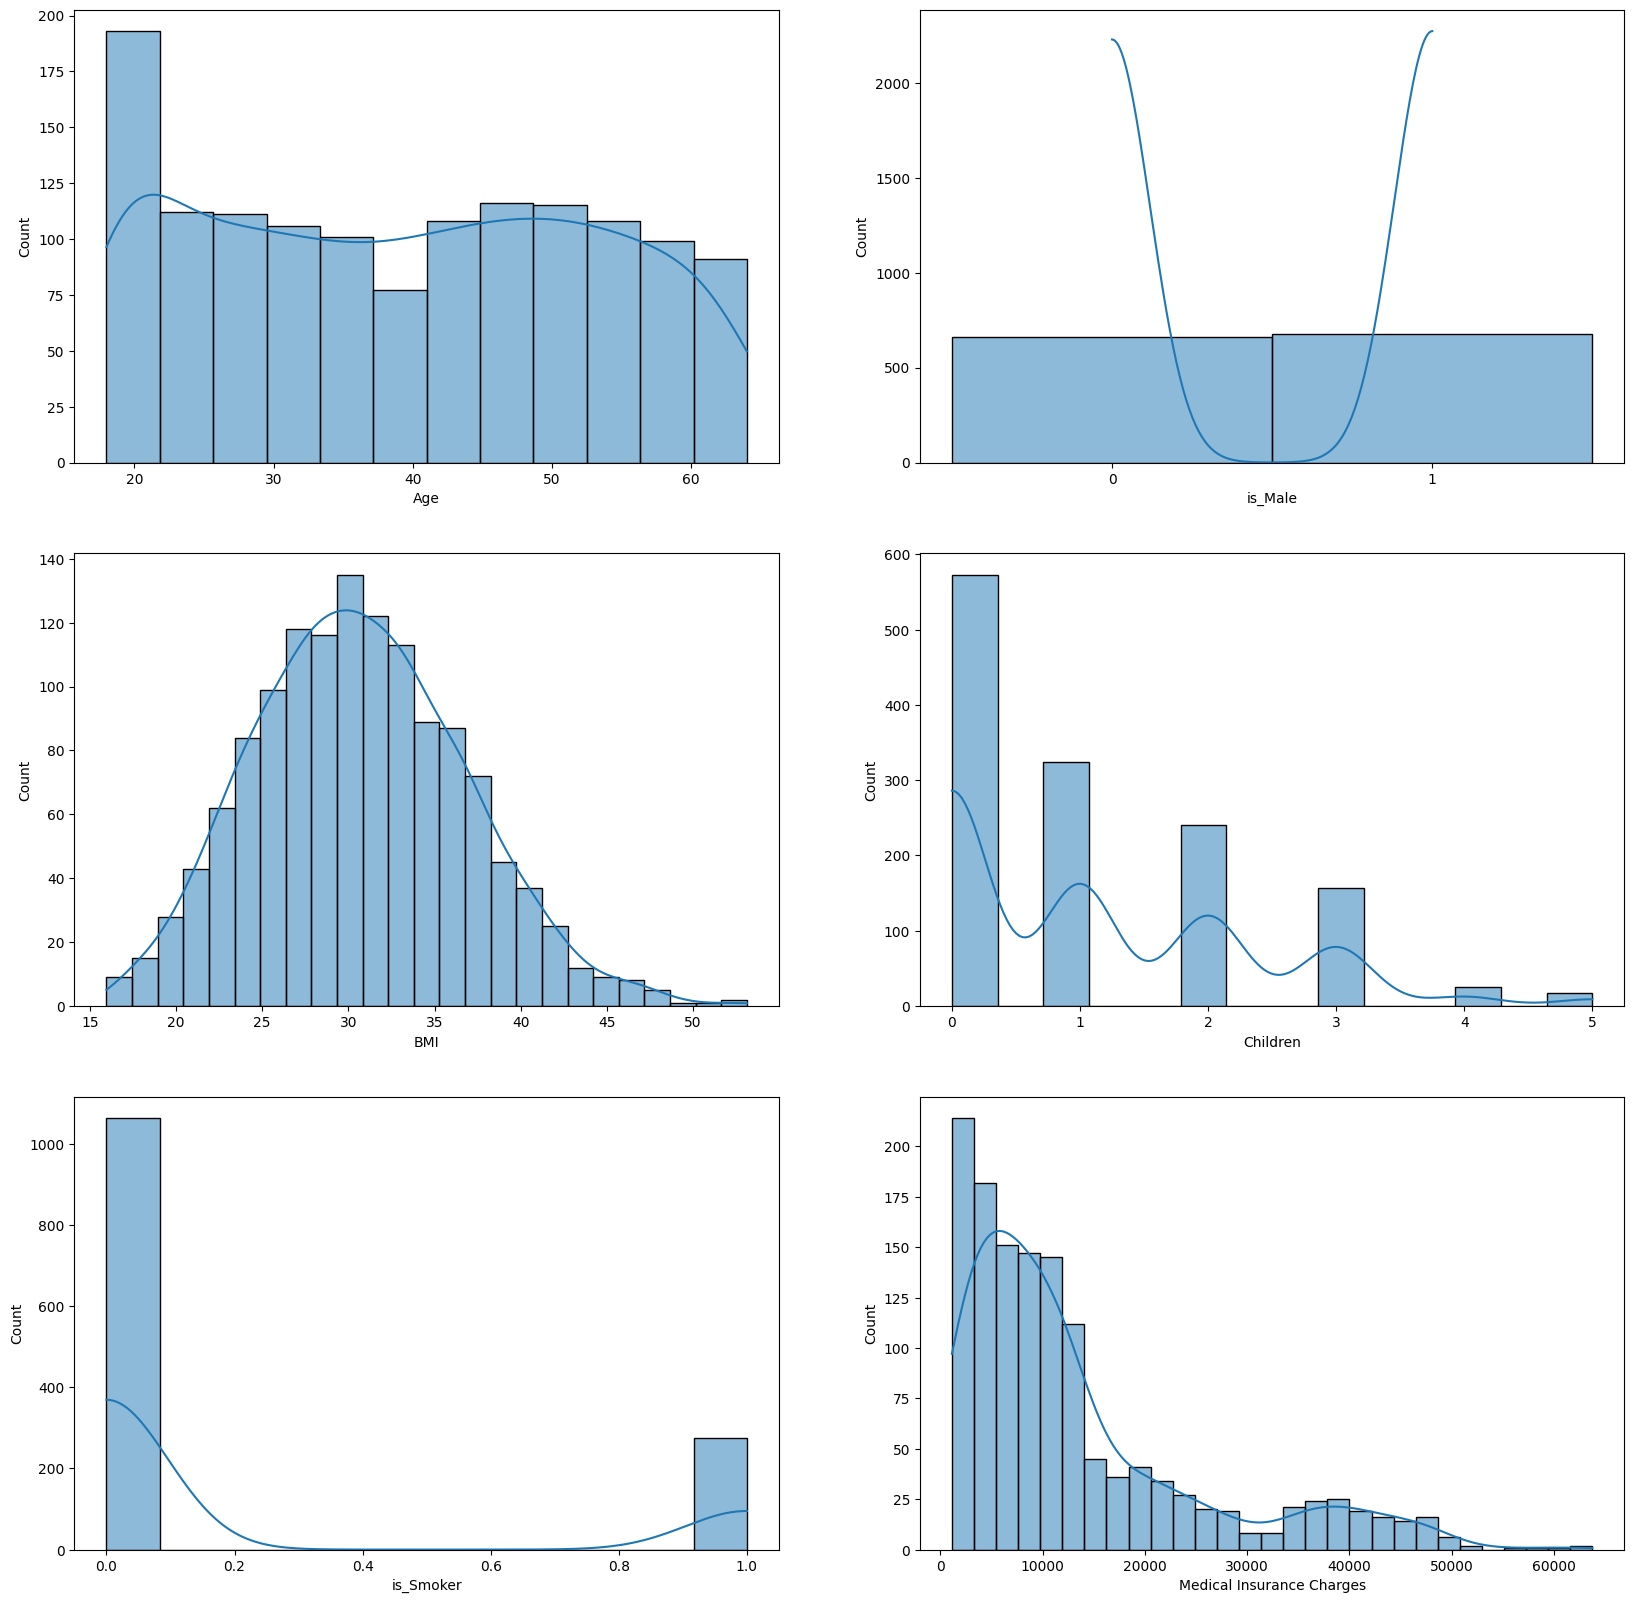

In [4]:
fig, axs = plt.subplots(3, 2, figsize=(20, 20))
axs = axs.ravel()

columns = ['Age', "is_Male", 'BMI', "Children", "is_Smoker", "Medical Insurance Charges"]

sns.histplot(data=df['Age'], kde=True, ax = axs[0])
sns.histplot(data=df["is_Male"], kde=True, ax = axs[1])
sns.histplot(data=df['BMI'], kde=True, ax = axs[2])
sns.histplot(data=df["Children"], kde=True, ax = axs[3])
sns.histplot(data=df["is_Smoker"], kde=True, ax = axs[4])
sns.histplot(data=df["Medical Insurance Charges"], kde=True, ax = axs[5])


### Correlation matrix heatmap

Text(0.5, 1.0, 'Correlation Heatmap')

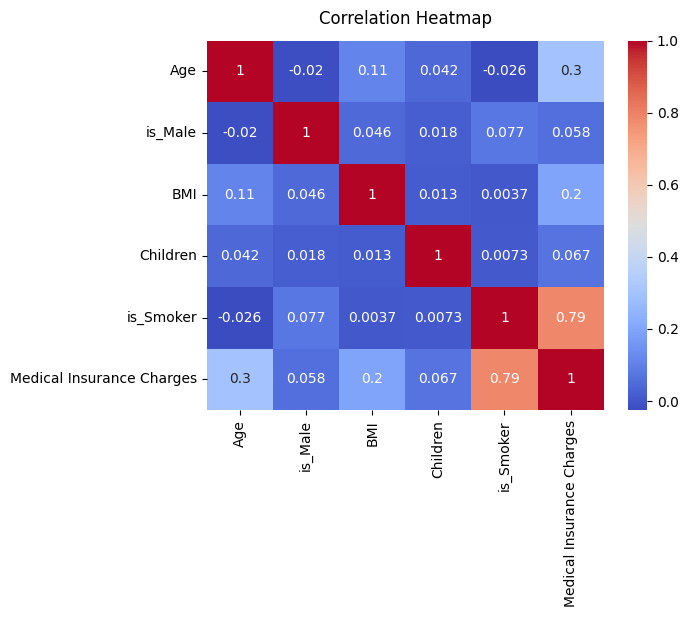

In [5]:
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", annot_kws={"size": 10}).set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

### Plots

Index(['Age', 'is_Male', 'BMI', 'Children', 'is_Smoker',
       'Medical Insurance Charges'],
      dtype='object')


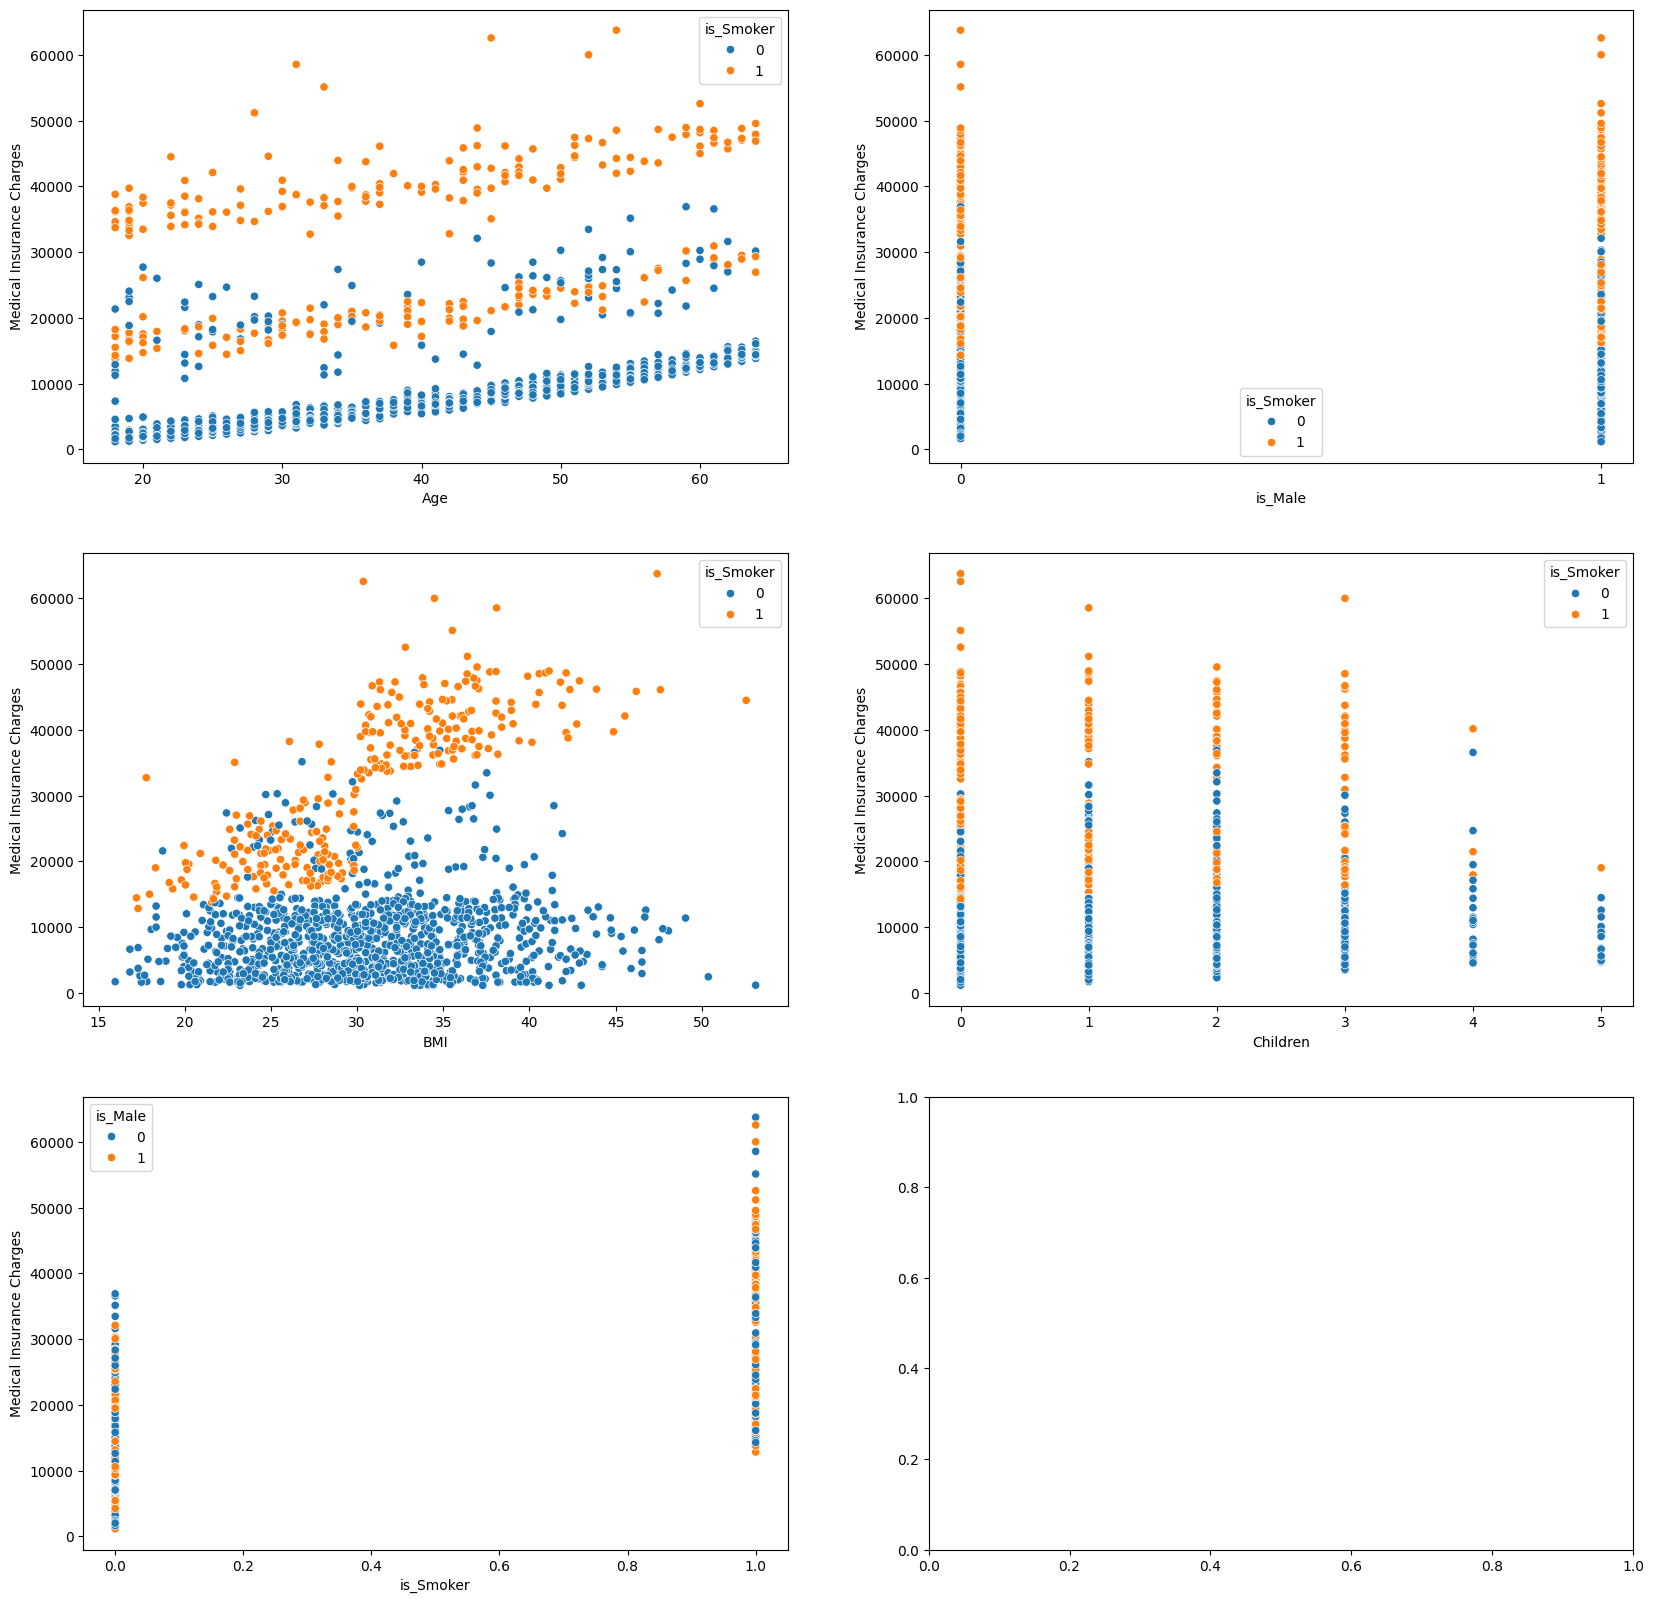

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [6]:
print(df.columns)

fig, axs = plt.subplots(3, 2, figsize=(20, 20))
axs = axs.ravel()

for i, column in enumerate(df):
        if column != "Medical Insurance Charges":
            
            plt.figure()
            
            #Colour of dots
            hue = "is_Smoker"
            if column == "is_Smoker":
                hue = "is_Male"
                
            sns.scatterplot(data=df, x=column, y="Medical Insurance Charges", hue = hue, ax=axs[i])

<Axes: xlabel='Age', ylabel='Medical Insurance Charges'>

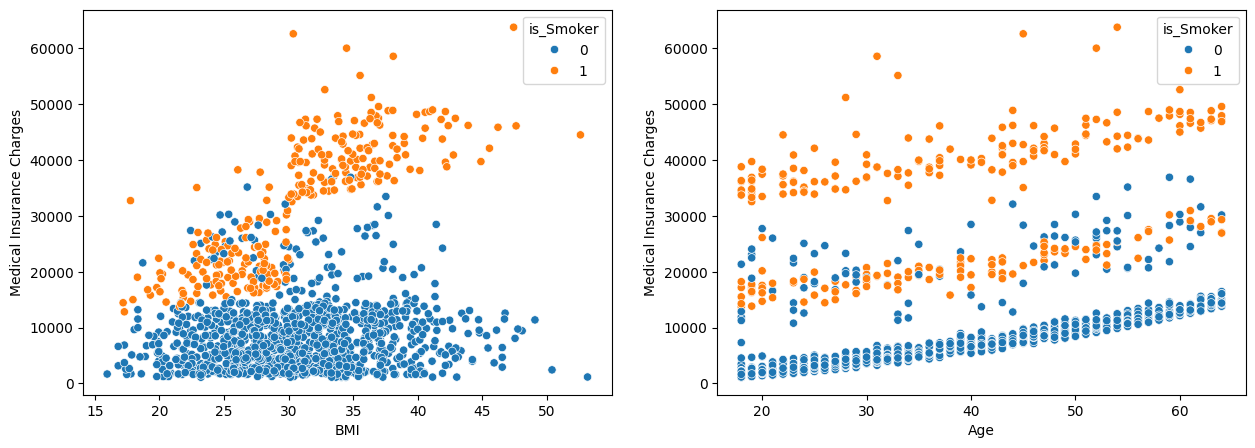

<Figure size 640x480 with 0 Axes>

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
sns.scatterplot(data=df, x="BMI", y="Medical Insurance Charges", hue = "is_Smoker", ax=axs[0])
plt.figure()
sns.scatterplot(data=df, x="Age", y="Medical Insurance Charges", hue = "is_Smoker", ax=axs[1])

### Logistic regression

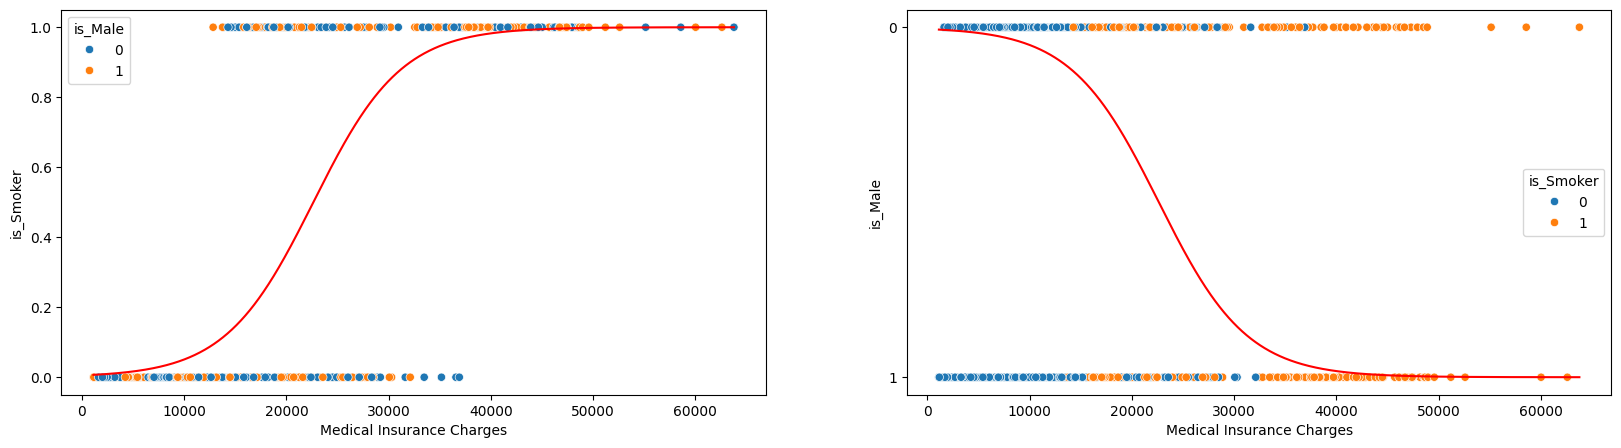

In [30]:
X_test = df[["Medical Insurance Charges"]]
X_space = np.linspace(X_test.min(), X_test.max(), 1000).reshape(-1, 1)  #Matrix between min and max with a single column and many rows

#Logistic regression
y_test1 = df['is_Smoker']
lr = LogisticRegression(solver = "liblinear").fit(X_test.values, y_test1.values)
y_test2 = df['is_Male']
lr2 = LogisticRegression(solver = "liblinear").fit(X_test.values, y_test2.values)

#Probabilities [:, 1] selects second column for probability of 1(True)
predictions1 = lr.predict_proba(X_space)[:, 1]#Probabilities [:, 1] selects second column for probability of 1(True)
predictions2 = lr.predict_proba(X_space)[:, 1]

#Plot
fig, axs = plt.subplots(1, 2, figsize=(20, 5))
axs = axs.ravel()

sns.scatterplot(data=df, x="Medical Insurance Charges", y='is_Smoker', hue='is_Male', ax=axs[0])
sns.scatterplot(data=df, x="Medical Insurance Charges", y='is_Male', hue='is_Smoker', ax=axs[1])

#Plot curves
axs[0].plot(X_space, predictions1, color='red')
axs[1].plot(X_space, predictions2, color='red')

### Linear regression

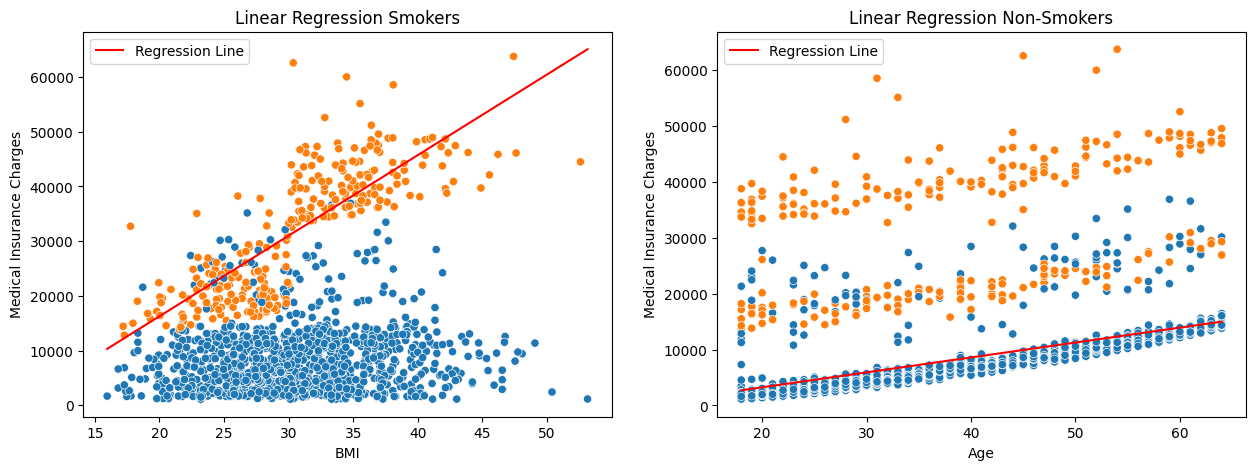

In [32]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs = axs.ravel()

axs[0].set_title('Linear Regression Smokers')
axs[1].set_title('Linear Regression Non-Smokers')
sns.scatterplot(data=df, x="BMI", y="Medical Insurance Charges", hue = "is_Smoker", ax=axs[0], legend=None)
sns.scatterplot(data=df, x="Age", y="Medical Insurance Charges", hue = "is_Smoker", ax=axs[1], legend=None)

#Seperate rows where is_Smoker is 1 and 0
is_Smoker = df.loc[df['is_Smoker'] == 1]
is_Not_Smoker = df.loc[df['is_Smoker'] == 0]

#Linear regression
y_test = is_Smoker["Medical Insurance Charges"]
X_test = is_Smoker[['BMI']]
lr1 = LinearRegression().fit(X_test.values, y_test.values)
y_test = is_Not_Smoker["Medical Insurance Charges"]
X_test = is_Not_Smoker[['Age']]
lr2 = LinearRegression().fit(X_test.values, y_test.values)

#Prediction input
X_space_BMI = np.linspace(df['BMI'].min(), df['BMI'].max(), 1000).reshape(-1, 1)  #Matrix between min and max with a single column and many rows
X_space_age = np.linspace(df['Age'].min(), df['Age'].max(), 1000).reshape(-1, 1)  #Matrix between min and max with a single column and many rows

#Predictions
is_smoker_predictions_Space = lr1.predict(X_space_BMI)
is_non_smoker_predictions_Space = lr2.predict(X_space_age)

#Plot linear lines
axs[0].plot(X_space_BMI, is_smoker_predictions_Space, color='red', label='Regression Line')
axs[0].legend()

axs[1].plot(X_space_age, is_non_smoker_predictions_Space, color='red', label='Regression Line')
axs[1].legend()

### Clustering and linear regression

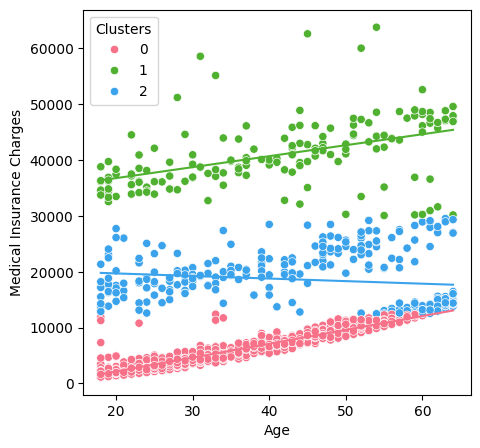

In [33]:
fig, axs = plt.subplots(1, 1, figsize=(5, 5))

#Perform clustering
clustering = KMeans(n_clusters = 3, n_init = 10)
clustering.fit(df[['Age', 'Medical Insurance Charges', 'BMI', 'is_Smoker', 'is_Male', "Children"]])

#Create new column for the clusters
df['Clusters'] = clustering.labels_

colors = sns.color_palette("husl", 3) #Create a list of colors for each cluster
sns.scatterplot(data=df, x="Age", y="Medical Insurance Charges", palette=colors, hue = "Clusters", ax=axs)

#Split data into 3 the clusters
cluster1 = df.loc[df['Clusters'] == 0]
cluster2 = df.loc[df['Clusters'] == 1]
cluster3 = df.loc[df['Clusters'] == 2]


#Linear regression
y_test = cluster1["Medical Insurance Charges"]
X_test = cluster1[['Age']]
lr1 = LinearRegression().fit(X_test.values, y_test.values)
y_test = cluster2["Medical Insurance Charges"]
X_test = cluster2[['Age']]
lr2 = LinearRegression().fit(X_test.values, y_test.values)
y_test = cluster3["Medical Insurance Charges"]
X_test = cluster3[['Age']]
lr3 = LinearRegression().fit(X_test.values, y_test.values)

#Predictions
X_space = np.linspace(df["Age"].min(), df["Age"].max(), 1000).reshape(-1, 1)  #Matrix between min and max with a single column and many rows
cluster1_predictions_Space = lr1.predict(X_space)
cluster2_predictions_Space = lr2.predict(X_space)
cluster3_predictions_Space = lr3.predict(X_space)

#Linear line plots
axs.plot(X_space, cluster1_predictions_Space, color=colors[0], label='Regression Line')
axs.plot(X_space, cluster2_predictions_Space, color=colors[1], label='Regression Line')
axs.plot(X_space, cluster3_predictions_Space, color=colors[2], label='Regression Line')